# Stabantenne
**Team B: Lucas & Lukas**

Es soll das elektrische Feld eines geladenen Leiters untersucht werden.

### Imports

In [1]:
# imports
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import animation

## Grundlagen


Herleitung der allgemeinen Lösungsformel für das elektrische Potential bzw. $\vec E$\-Feld aus den Maxwellgleichungen.

Die Maxwell-Gleichungen der Elektrostatik lauten:
$$
	div(\vec E) = \frac{\varrho}{\varepsilon} \Leftrightarrow \oiint \vec E \ d\vec A = \frac{Q}{\varepsilon}\\
	rot(\vec E) = \vec 0 \Leftrightarrow \oint \vec E \ d\vec A = \vec 0
$$


### Konstanten

In [2]:
L = 1  # Länge der Antenne [m]
epsilon_0 = 8.8542e-12  # elektrische Feldkonstante in [A s / V m]
N = 2**6
lmbda = 1 # Linienladungsdichte auf der Antenne in [A s / m]
c = 3*10**8 # Lichgeschwindigkeit [m/s]

## Analytischer Fall

### Vereinfachende Annahmen
* Vakuum
* endlich langer Leiter
* gerader Leiter
* unendlich dünner Leiter
* konstante (Linien-)Ladungsdichte

### Parameter
$\lambda$ ... konstante Linienstromdichte    
L ... Länge der Antenne

### Analytische Lösung


Herleitung der analytischen Lösung aus der allgemeinen Lösungsformel



#### Elektrisches Potenzial

$$
	U(\vec r) = \frac{1}{4\pi\varepsilon_0} \int \int \int \frac{\varrho(\vec r')}{|\vec r - \vec r'|} d^3\vec r'
$$

Dabei gilt:
$$\vec r = \begin{pmatrix}
		x \\
		y \\
		z \\
	\end{pmatrix}
	\qquad
	\vec r' = \begin{pmatrix}
		x' \\
		y' \\
		z' \\
	\end{pmatrix}$$
Für $\frac{-L}{2} <= z <= \frac{L}{2}$ gilt:
$$
	\varrho(\vec r') = \lambda \delta(x') \delta(y')
$$
Mit 0 sonst.
Damit können wir den Zähler ersetzen:
$$
    U(\vec r) = \frac{1}{4\pi\varepsilon_0} \int_{-L/2}^{L/2} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \frac{\lambda \delta(x') \delta(y')}{\sqrt{(x-x')^2 + (y-y')^2 + (z-z')^2}} dx' dy' dz'
$$

Mit der Definition des Diracs $f(x) = \int_{-\infty}^{\infty} f(x') \delta(x'-x)dx'$ fällt das Integral raus.

$$
    = \frac{1}{4\pi\varepsilon_0} \int_{-L/2}^{L/2} \int_{-\infty}^{\infty} \frac{\lambda \delta(y')}{\sqrt{x^2 + (y-y')^2 + (z-z')^2}} dy' dz'
$$

Mit der Definition des Diracs $f(y) = \int_{-\infty}^{\infty} f(y') \delta(y'-y)dy'$ fällt das Integral raus.

$$
    = \frac{1}{4\pi\varepsilon_0} \int_{-L/2}^{L/2} \frac{\lambda}{\sqrt{x^2 + y^2 + (z-z')^2}} dz' \\
    = \frac{\lambda}{4\pi\varepsilon_0} \int_{-L/2}^{L/2} \frac{1}{\sqrt{x^2 + y^2 + (z-z')^2}} dz'
$$

Um das Integral jetzt zu lösen, substituieren wir zweimal. Das erste mal mit $s := z-z'$. Damit ist $dz'=-ds$. Die zweite Substituierung erfolgt mit $\varrho^2 := x^2+y^2$.

$$
	= -\frac{\lambda}{4\pi\varepsilon_0} \int_{z+L/2}^{z-L/2} \frac{1}{\sqrt{\varrho^2+s^2}} ds \\
    = \frac{\lambda}{4\pi\varepsilon_0} \int_{z-L/2}^{z+L/2} \frac{1}{\sqrt{\varrho^2+s^2}} ds
$$

Hier löst Wolframalpha das Integral auf. Wir erhalten damit dann:

$$
	= \frac{\lambda}{4\pi\varepsilon_0} \cdot \left[\frac{1}{2} \ln\left(\frac{\sqrt{s^2+\varrho^2} + s}{\sqrt{s^2+\varrho^2} - s}\right) \right]_{s=z-L/2}^{s=z+L/2} 
$$

Mit der Definition $arsinh(x)=\ln\left({x+\sqrt{x^2+1}}\right)$ können wir den Lograithmus umformen.

$$
	= \frac{\lambda}{8\pi\varepsilon_0} \cdot \left[\ln\left(\frac{\sqrt{\left(\frac{s}{\varrho}\right)^2+1} + \frac{s}{\varrho}}{\sqrt{\left(\frac{s}{\varrho}\right)^2+1} - \frac{s}{\varrho}}\right) \right]_{s=z-L/2}^{s=z+L/2}
$$

Wenn wir jetzt mit $\sqrt{\left(\frac{s}{\varrho}\right)^2+1} + \frac{s}{\varrho}$ erweitern erhalten wir:

$$
 	= \frac{\lambda}{8\pi\varepsilon_0} \cdot \left[\ln\left(\frac{\left(\sqrt{\left(\frac{s}{\varrho}\right)^2+1} + \frac{s}{\varrho}\right)^2}{\left(\sqrt{\left(\frac{s}{\varrho}\right)^2+1} - \frac{s}{\varrho}\right) \cdot \left(\sqrt{\left(\frac{s}{\varrho}\right)^2+1} + \frac{s}{\varrho}\right)}\right) \right]_{s=z-L/2}^{s=z+L/2} \\
	= \frac{\lambda}{8\pi\varepsilon_0} \cdot \left[\ln\left(\frac{\left(\sqrt{\left(\frac{s}{\varrho}\right)^2+1} + \frac{s}{\varrho}\right)^2}{\left(\frac{s}{\varrho}\right)^2 + 1 -\left(\frac{s}{\varrho}\right)^2}\right) \right]_{s=z-L/2}^{s=z+L/2} \\
    = \frac{\lambda}{8\pi\varepsilon_0} \cdot \left[\ln\left(\sqrt{\left(\frac{s}{\varrho}\right)^2 + 1} + \frac{s}{\varrho}\right)^2\right]_{s=z-L/2}^{s=z+L/2} \\
    = \frac{\lambda}{4\pi\varepsilon_0} \cdot \left[\ln\left(\sqrt{\left(\frac{s}{\varrho}\right)^2 + 1} + \frac{s}{\varrho}\right)\right]_{s=z-L/2}^{s=z+L/2}
$$

Jetzt können wir die oben genannte Definition $arsinh(x)=\ln\left({x+\sqrt{x^2+1}}\right)$ anwenden.

$$
= \frac{\lambda}{4\pi\varepsilon_0} \cdot \left[\operatorname{arsinh}\left(\frac{s}{\varrho}\right)\right]_{s=z-L/2}^{s=z+L/2}
$$

Wenn wir die Integralgrenzen einsetzen und $\varrho^2 = x^2+y^2$ wieder zurück substituieren erhalten wir:

$$
	U(\vec r) = \frac{\lambda}{4\pi\varepsilon_0} \cdot \left(arsinh\left(\frac{z+\frac{L}{2}}{\varrho}\right)-arsinh\left(\frac{z-\frac{L}{2}}{\varrho}\right)\right) \\
    U(\vec r) = \frac{\lambda}{4\pi\varepsilon_0} \cdot \left(arsinh\left(\frac{z+\frac{L}{2}}{\sqrt{x^2+y^2}}\right)-arsinh\left(\frac{z-\frac{L}{2}}{\sqrt{x^2+y^2}}\right)\right)
$$



In [3]:
#konstanter Faktor 1/4*pi*epsilon_0
faktor = 1 / (4*np.pi * epsilon_0)

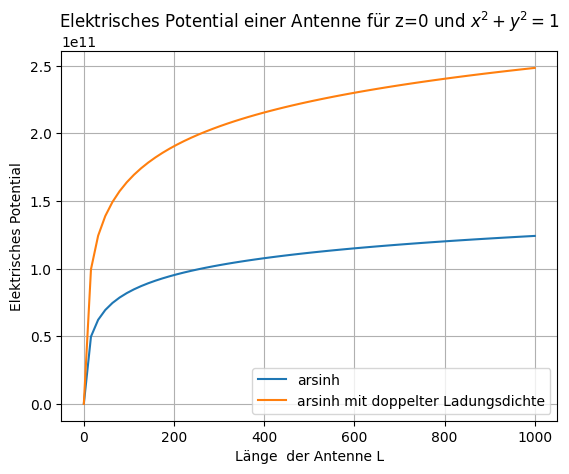

In [4]:
#Visualisierung des Elektrischen Potentials einer Antenne mit variabler Länge l auf dem Einheitskreis in der x-y-Ebene bei z=0

#Definitionsbereich von l
l = np.linspace(0,1000*L,N)  # KS: Warum nicht -L/2 bis +L/2?
                             # LS: Das beschreibt eigentlich nur wie die Länge der Antenne. x als Name ist da etwas untreffend gewesen   

# Einfache Ladungsdichte lambda
f1 = 2 * faktor * lmbda * np.arcsinh(l/2)

#Verdopplung der Ladungsdichte lambda
# KS: Das ist nicht weiter spannend, da das Potenzial in der Linienladungsdichte linear ist.
f2 = 4 * faktor * lmbda * np.arcsinh(l/2)

#pyplot
plt.plot(l,f1, label='arsinh')
plt.plot(l,f2, label='arsinh mit doppelter Ladungsdichte')
plt.xlabel('Länge  der Antenne L')
plt.ylabel('Elektrisches Potential')
plt.grid()
plt.legend()
plt.title('Elektrisches Potential einer Antenne für z=0 und $x^2+y^2=1$')
plt.show()

##### Berechnungen mit dem langen Integral



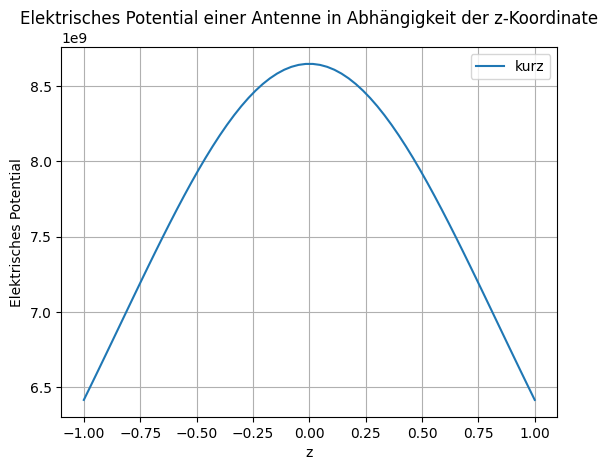

In [5]:
#Potential z-Achse in einem Radius um die Antenne
bound = 1
z = np.linspace(-bound, bound, N)
radius = 1
rho = radius
rho_quadrat = radius**2

potential_z = faktor * lmbda * (np.arcsinh((z+L/2)/rho) - np.arcsinh((z-L/2)/rho))

plt.plot(z,potential_z,label='kurz')
plt.xlabel('z')
plt.ylabel('Elektrisches Potential')
plt.grid()
plt.legend()
plt.title('Elektrisches Potential einer Antenne in Abhängigkeit der z-Koordinate')
plt.show()

##### Günstigere Rechnung unter Nutzung der Symmetrie

C:\Users\01luk\AppData\Local\Temp\ipykernel_23320\3164539123.py:7: RuntimeWarning: divide by zero encountered in divide
  U = lmbda * faktor * (np.arcsinh((z+L/2)/np.abs(rho)) - np.arcsinh((z-L/2)/np.abs(rho)))
C:\Users\01luk\AppData\Local\Temp\ipykernel_23320\3164539123.py:7: RuntimeWarning: invalid value encountered in subtract
  U = lmbda * faktor * (np.arcsinh((z+L/2)/np.abs(rho)) - np.arcsinh((z-L/2)/np.abs(rho)))


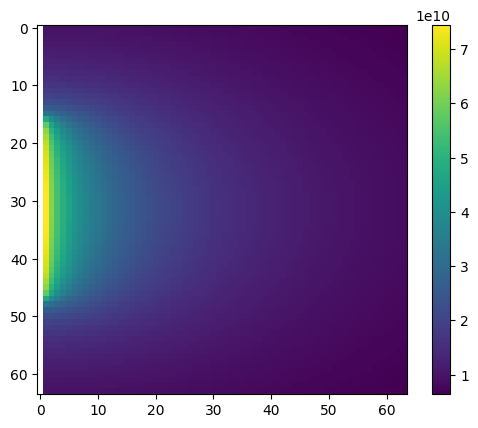

In [6]:
#Ersetzen von x und y mit rho -> Darstellung in Zylinderkoordinaten mit z und rho, unabhängig vom Winkel phi
rho_range = np.linspace(0, L, N)#.reshape(1, -1)
z_range = np.linspace(-L, L, N)#.reshape(-1, 1)

rho, z = np.meshgrid(rho_range, z_range)

U = lmbda * faktor * (np.arcsinh((z+L/2)/np.abs(rho)) - np.arcsinh((z-L/2)/np.abs(rho)))
plt.imshow(U)
plt.colorbar()

#### Elektrisches Feld

<span class="user-mention" account-id=12766f2d-fb08-46f1-b44a-6ef0493b8688>@Konrad Schöbel</span> **Vorsicht!:** Die Komponenten des Gradienten sind nur in kartesischen Koordinaten die partiellen Ableitungen nach den Koordinaten.  In anderen Koordinaten gilt das nicht.

<span class="user-mention" account-id=8afc2cd4-a17a-464f-b048-069ae358a6d9>@Lukas Schäfer</span> Angepasst für Zylinderkoordinaten.


Der Zusammenhang zwischen dem elektrischen Potential und der elektrischen Feldstärke lässt sich über
$$
	\vec{E}(\vec{r}) = -\vec{\nabla} U(\vec{r})
$$beschreiben.

Der Gradient der Funktion $U(\vec{r})$ in Zylinderkoordinaten ergibt sich:
$$
	\vec{\nabla} U(\vec{r}) = 
		\begin{pmatrix} 
			\frac{dU(\vec{r})}{d\varrho} \\
			\frac{1}{\varrho}\frac{dU(\vec{r})}{d\varphi} \\
			\frac{dU(\vec{r})}{dz}
		\end{pmatrix}
$$

Wir leiten $U(\vec{r})$ zunächst die erste Komponente nach $\varrho$ ab:
$$
	\frac{dU(\vec r)}{d\varrho} 
	= \frac{d}{d\varrho}\frac{\lambda}{4\pi\varepsilon_0} \cdot \left(arsinh\left(\frac{z+\frac{L}{2}}{\varrho}\right)-arsinh\left(\frac{z-\frac{L}{2}}{\varrho}\right)\right) \\\
	= -\frac{\lambda}{4\pi\varepsilon_0}\cdot\left[\frac{\frac{L}{2} + z}{\varrho^2 \sqrt{1 + \left(\frac{\frac{L}{2} + z}{\varrho}\right)^2}}-\frac{\frac{L}{2} - z}{\varrho^2 \sqrt{1 + \left(\frac{z-\frac{L}{2}}{\varrho}\right)^2}}\right] = -E_{\varrho}
$$
Da unsere Funktion nicht von $\varphi$ abhängt, wird die zweite Komponente 0.

Dann leiten wir noch die dritte Komponente nach z ab.
$$
	\frac{dU(\vec r)}{dz} 
	= \frac{d}{dz}\frac{\lambda}{4\pi\varepsilon_0} \cdot \left(arsinh\left(\frac{z+\frac{L}{2}}{\varrho}\right)-arsinh\left(\frac{z-\frac{L}{2}}{\varrho}\right)\right) \\
	= \frac{\lambda}{4\pi\varepsilon_0}\cdot\left[\frac{1}{\varrho \sqrt{1 + \left(\frac{\frac{L}{2} + z}{\varrho}\right)^2}}-\frac{1}{\varrho \sqrt{1 + \left(\frac{z-\frac{L}{2}}{\varrho}\right)^2}}\right] = -E_{z}
$$

Damit erhalten wir für das elektrische Feld:
$$\vec{\nabla} U(\vec{r}) = 
		\begin{pmatrix} 
			\frac{dU(\vec{r})}{d\varrho} \\
			\frac{1}{\varrho}\frac{dU(\vec{r})}{d\varphi} \\
			\frac{dU(\vec{r})}{dz}
		\end{pmatrix} = \begin{pmatrix}
        	E_{\varrho} \\
            0 \\
            E_{z}
        \end{pmatrix}$$


In [7]:
E_rho = lmbda * faktor * (rho*(L/2+z)/(np.abs(rho)**3*np.sqrt(1+((L/2+z)/rho)**2)) - rho*(z-L/2)/(np.abs(rho)**3*np.sqrt(1+((z-L/2)/rho)**2)))
E_z = -lmbda * faktor * (2/np.sqrt((L+2*z)**2+4*rho**2)-2/np.sqrt((L-2*z)**2+4*rho**2))

C:\Users\01luk\AppData\Local\Temp\ipykernel_23320\2753063556.py:1: RuntimeWarning: divide by zero encountered in divide
  E_rho = lmbda * faktor * (rho*(L/2+z)/(np.abs(rho)**3*np.sqrt(1+((L/2+z)/rho)**2)) - rho*(z-L/2)/(np.abs(rho)**3*np.sqrt(1+((z-L/2)/rho)**2)))
C:\Users\01luk\AppData\Local\Temp\ipykernel_23320\2753063556.py:1: RuntimeWarning: invalid value encountered in multiply
  E_rho = lmbda * faktor * (rho*(L/2+z)/(np.abs(rho)**3*np.sqrt(1+((L/2+z)/rho)**2)) - rho*(z-L/2)/(np.abs(rho)**3*np.sqrt(1+((z-L/2)/rho)**2)))


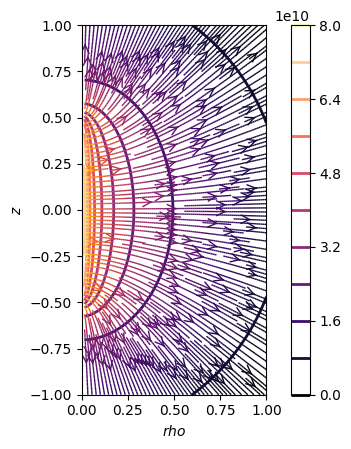

In [8]:
fig = plt.figure()
ax = fig.add_subplot()
color_plot = plt.contour(rho, z, U, cmap="magma", linewidths=2, levels=10)
ax.streamplot(rho, z, E_rho, E_z, linewidth=1, cmap=plt.cm.inferno,
              density=3, arrowstyle='->', arrowsize=1.5, color=np.log(np.sqrt(E_rho**2 + E_z**2)))
ax.plot([0, 0], [-L/2, L/2], color="red")
plt.colorbar(color_plot)

ax.set_xlabel('$rho$')
ax.set_ylabel('$z$')
ax.set_xlim(np.min(rho_range), np.max(rho_range))
ax.set_ylim(np.min(z_range), np.max(z_range))
ax.set_aspect('equal')
plt.show()

### Numerische Berechnung im statischen Fall

#### Elektrisches Potential

In [9]:
lmbda = 1
faktor = 1 / (4*np.pi * epsilon_0)

<span class="user-mention" account-id=12766f2d-fb08-46f1-b44a-6ef0493b8688>@Konrad Schöbel</span> $\varrho$ geht eigentlich nur von 0 bis 


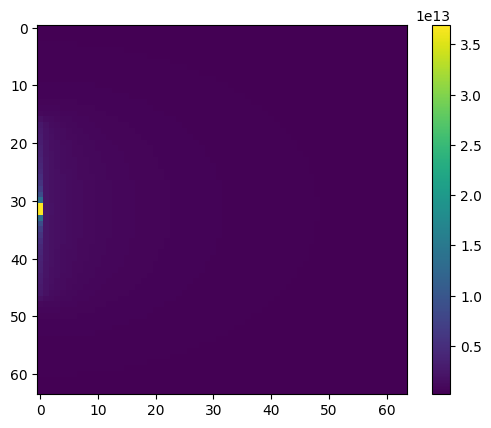

In [10]:
#rho und z neu definieren
rho_num = np.linspace(0, L, N).reshape(1,-1,1)
z_num = np.linspace(-L, L, N).reshape(-1,1,1)
z_ = np.linspace(-L/2, +L/2, N//2).reshape(1,1,-1)

#numerische Berechnung für das Potential
d = np.sqrt(rho_num**2 + (z_num-z_)**2)
integrand = lmbda / d
U_num = faktor * np.trapz(integrand, axis=2)
# U_num = np.trapz(integrand, axis=2)

plt.imshow(U_num)
plt.colorbar()

#### Elektrisches Feld

In [11]:
#Elektrisches Feld berechnen
E_rho_num, E_z_num = np.gradient(U_num)
E_rho_num = - E_rho_num
E_z_num = - E_z_num
E_num = np.gradient(U_num)
E_num = -1 * E_num

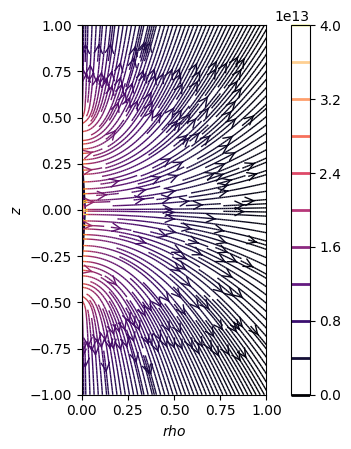

In [12]:
#Darstellung des elektrischen Feldes
fig = plt.figure()
ax = fig.add_subplot()
color_plot = plt.contour(rho_num[0,:,0], z_num[:,0,0], U_num, cmap="magma", linewidths=2, levels=10)
ax.streamplot(rho_num[0,:,0], z_num[:,0,0], E_z_num, E_rho_num, linewidth=1, cmap=plt.cm.inferno,
              density=3, arrowstyle='->', arrowsize=1.5, color=np.log(np.sqrt(E_rho_num**2 + E_z_num**2)))
ax.plot([0, 0], [-L/2, L/2], color="red")
plt.colorbar(color_plot)

ax.set_xlabel('$rho$')
ax.set_ylabel('$z$')
ax.set_xlim(np.min(rho_num), np.max(rho_num))
ax.set_ylim(np.min(z_num), np.max(z_num))
ax.set_aspect('equal')
plt.show()

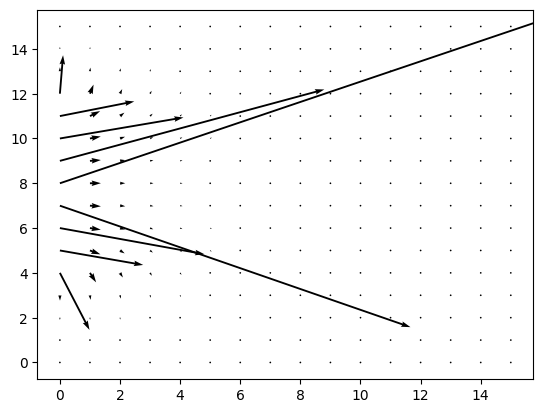

In [13]:
plt.quiver(E_z_num[::4, ::4], E_rho_num[::4, ::4])

### Numerische Berechnung im dynamischen Fall


#### Elektrisches Potenzial

In [14]:
z = np.linspace(-L, L, N).reshape(-1,1,1, 1)
rho = np.linspace(-L, L, N//2).reshape(1,-1,1, 1)
z_ = np.linspace(-L/2, +L/2, 2*N).reshape(1,1,-1, 1)
t = np.linspace(0, 2*np.pi, N).reshape(1, 1, 1, -1)

In [15]:
lmbda = 1

In [16]:
T = 2*np.pi

In [17]:
d = np.sqrt(rho**2 + (z-z_)**2)

In [18]:
lmbda_dyn = np.sin(2*np.pi*z_/L) * np.sin(2*np.pi * (t-d/c) / T)
lmbda_dyn.shape

(64, 32, 128, 64)

In [19]:
# lmbda = np.cos(2*np.pi*z_/L) * np.sin(2*np.pi * (t-d/c) / T)
# lmbda.shape

In [20]:
integrand = lmbda_dyn / d
U_num_dyn = np.trapz(integrand,axis=2)

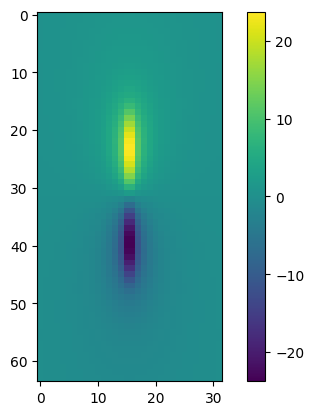

In [21]:
plt.imshow(U_num_dyn[:,:,t.shape[-1]//2])
plt.colorbar()

MovieWriter ffmpeg unavailable; using Pillow instead.


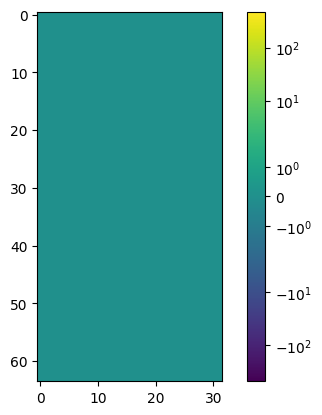

In [22]:
fig = plt.figure()

def animate(k):
    plt.clf()
    plt.imshow(U_num_dyn[:, :, k], vmin=np.min(U_num_dyn), vmax=np.max(U_num_dyn), norm="symlog")
    plt.colorbar()

ani = animation.FuncAnimation(fig, animate, frames=t.shape[-1], interval=200)
ani.save('animation_sin.gif', writer='ffmpeg')

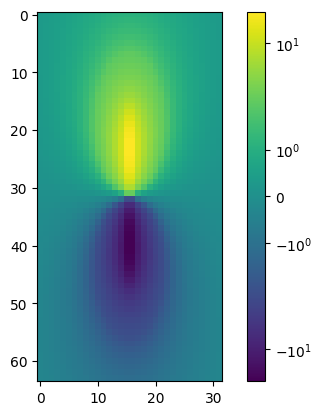

In [23]:
plt.imshow(U_num_dyn[:,:,t.shape[-1]//2], norm="symlog")
plt.colorbar()

#### Elektrisches Feld

In [24]:
E_z_dyn, E_rho_dyn = np.gradient(U_num_dyn, axis=(0,1))
E_rho_dyn = - E_rho_dyn
E_z_dyn = - E_z_dyn

MovieWriter Pillow unavailable; using Pillow instead.
C:\Users\01luk\AppData\Local\Temp\ipykernel_23320\3116155968.py:13: RuntimeWarning: divide by zero encountered in log
  density=3, arrowstyle='->', arrowsize=1.5, color=np.log(np.sqrt(E_rho_dyn[:,:,k]**2 + E_z_dyn[:,:,k]**2)))
f:\Uni\Feldtheorie\venv\Lib\site-packages\matplotlib\colors.py:1318: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
f:\Uni\Feldtheorie\venv\Lib\site-packages\matplotlib\colors.py:1325: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


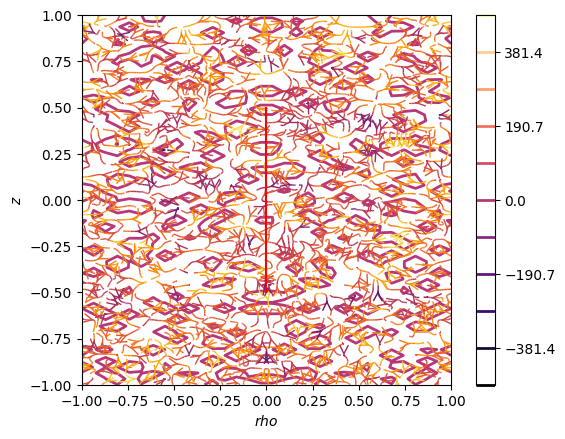

In [25]:
fig = plt.figure()
v_min = np.min(U_num_dyn)
v_max = np.max(U_num_dyn)

own_levels = np.linspace(v_min,v_max, 11)
own_levels = np.round(own_levels, decimals=2)

def animate(k):
    plt.clf()
    ax = fig.add_subplot()
    color_plot = plt.contour(rho[0,:,0,0], z[:,0,0,0], U_num_dyn[:,:,k], levels=own_levels, linewidths=2, cmap="magma")
    ax.streamplot(rho[0,:,0,0], z[:,0,0,0], E_rho_dyn[:,:,k], E_z_dyn[:,:,k], linewidth=1, cmap=plt.cm.inferno,
                  density=3, arrowstyle='->', arrowsize=1.5, color=np.log(np.sqrt(E_rho_dyn[:,:,k]**2 + E_z_dyn[:,:,k]**2)))
    ax.plot([0, 0], [-L/2, L/2], color="red")
    plt.colorbar(color_plot)

    ax.set_xlabel('$rho$')
    ax.set_ylabel('$z$')
    ax.set_xlim(-L,L)
    ax.set_ylim(-L,L)
    ax.set_aspect('equal')

ani = animation.FuncAnimation(fig, animate, frames=t.shape[-1], interval=200)
ani.save('animation_sin_komplett.gif', writer='Pillow')

#### Fehlerbetrachtung analytische und numerische Berechnung



In [26]:
# U_err = np.abs(U - U_num)
U_err = U_num / U

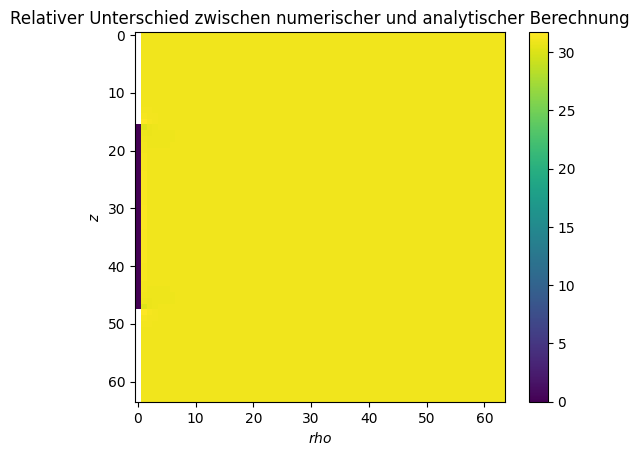

In [27]:
plt.title('Relativer Unterschied zwischen numerischer und analytischer Berechnung')
plt.xlabel('$rho$')
plt.ylabel('$z$')
plt.imshow(U_err)
plt.colorbar()

Es tritt eine enorme Abweichung zwischen numerischer und analytischer Berechnung auf. Größenordnung $10^{12}$. Wir haben leider nicht herausfinden können warum.

***

## Verallgemeinerung

Anregungen mit Hinblick auf Antennen:

- Aufweichen der Idealisierungen:
  - beliebige Ladungsdichte
  - beliebig gekrümmter Leiter, z.B. Kreis
  - flacher Leiter, z.B. Kreisscheibe
  - massiver Leiter
    - rotationssymmetrisch, z.B. Zylinder
    - nicht symmetrisch, z.B. Quader
- Zeitabhängigkeit
  - naiv
  - retardiert
  - Wie müsste das zugehörige Magnetfeld aussehen?
  - Wie gut sind die Maxwellgleichungen erfüllt?



### Massive Antenne



In [28]:
N = 2**5 # Quantisierung
K = 2    # Kantenlänge in der Breite
M = 4    # Kantenlänge in der Tiefe
L = 30   # Kantenlänge in der Höhe
R = 40   # Kantenlänge des zu betrachtenden Raums

In [29]:
# Definition des Raums
x = np.linspace(-R/2, R/2, N)
y = np.linspace(-R/2, R/2, 2*N)
z = np.linspace(-R/2, R/2, 4*N)

In [30]:
# Definition der Antenne im Raum
antenna_x_range = np.logical_and(np.greater(x, -K/2), np.less(x, K/2))
antenna_y_range = np.logical_and(np.greater(y, -M/2), np.less(y, M/2))
antenna_z_range = np.logical_and(np.greater(z, -L/2), np.less(z, L/2))

In [109]:
# Ladungsverteilung der Antenne
def ladung(ladung_x, ladung_y, ladung_z):
    #Festlegung, dass die Ladungsverteilung ein Sinus in z-Richtung sein soll
    # return np.sin(2*np.pi*ladung_z/(np.max(z[antenna_z_range]) - np.min(z[antenna_z_range])))
    return 1
    # return ladung_x**2 + ladung_y**2 + ladung_z**2

In [110]:
# leeres Array anlegen, dass die gleiche Größe wie der zu untersuchende Raum hat
U = np.empty((len(x), len(y), len(z)))

# Berechnung der Ladungsverteilung in der Antenne
lmbda_x_y_z = ladung(x[antenna_x_range].reshape(-1, 1, 1), y[antenna_y_range].reshape(1, -1, 1), z[antenna_z_range].reshape(1, 1, -1))

# Iteration über jeden Raumpunkt -> spart Speicherverbrauch ein
for x_index, x_val in np.ndenumerate(x):
    for y_index, y_val in np.ndenumerate(y):
        for z_index, z_val in np.ndenumerate(z):
            # Berechnung (x'-x)², (y'-y)² und (z'-z)²
            d_x = (x[antenna_x_range] - x_val)**2
            d_y = (y[antenna_y_range] - y_val)**2
            d_z = (z[antenna_z_range] - z_val)**2
            # Berechnung von lmbda / |r'-r|
            integrand = lmbda_x_y_z/np.sqrt(d_x.reshape(-1, 1, 1) + d_y.reshape(1, -1, 1) + d_z.reshape(1, 1, -1))
            # Speichern des Potentials im Ergebnisarray
            U[x_index, y_index, z_index] = np.trapz(np.trapz(np.trapz(integrand)))
            # integrand löschen, um Speicher zu leeren
            del integrand

U = faktor * U


C:\Users\01luk\AppData\Local\Temp\ipykernel_23320\2002001489.py:16: RuntimeWarning: divide by zero encountered in divide
  integrand = lmbda_x_y_z/np.sqrt(d_x.reshape(-1, 1, 1) + d_y.reshape(1, -1, 1) + d_z.reshape(1, 1, -1))


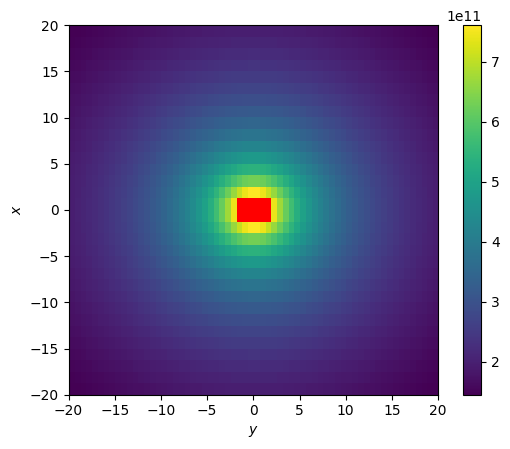

In [111]:
#Darstellung der massiven Antenne in der x-y-Ebene, geschnitten bei der Hälfte der Antennenlänge in z-Richtung
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('$y$')
ax.set_ylabel('$x$')
cmap = plt.colormaps.get_cmap('viridis')  # viridis is the default colormap for imshow
cmap.set_bad(color='red')
plt.imshow(U[:,:,len(z)//2], cmap=cmap, extent=[np.min(y), np.max(y), np.min(x), np.max(x)])
plt.colorbar()

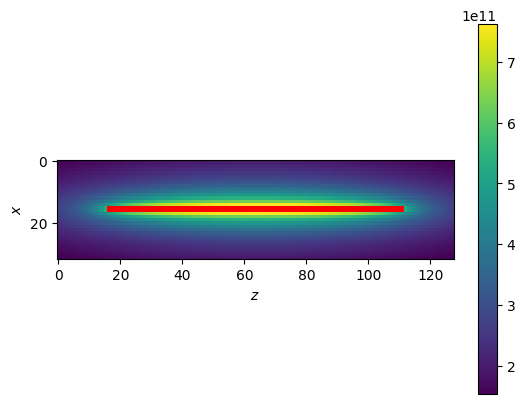

In [112]:
#Darstellung der massiven Antenne in der x-z-Ebene, geschnitten bei der Hälfte der Antennenlänge in y-Richtung
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('$z$')
ax.set_ylabel('$x$')
cmap = plt.colormaps.get_cmap('viridis')  # viridis is the default colormap for imshow
cmap.set_bad(color='red')
plt.imshow(U[:, len(y)//2,:], cmap=cmap)
plt.colorbar()

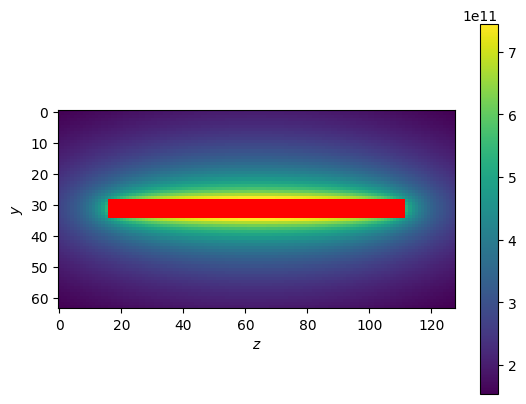

In [113]:
#Darstellung der massiven Antenne in der y-z-Ebene, geschnitten bei der Hälfte der Antennenlänge in x-Richtung
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlabel('$z$')
ax.set_ylabel('$y$')
cmap = plt.colormaps.get_cmap('viridis')  # viridis is the default colormap for imshow
cmap.set_bad(color='red')
plt.imshow(U[len(x)//2, :, :], cmap=cmap)
plt.colorbar()

In [114]:
#Berechnung des Elektrischen Feldes
E_x, E_y, E_z = np.gradient(U)
E_x = -E_x
E_y = -E_y
E_z = -E_z

f:\Uni\Feldtheorie\venv\Lib\site-packages\numpy\lib\function_base.py:1238: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)


In [115]:
subsampling = (4, 8, 16)

In [116]:
U_min = np.min(np.ma.masked_invalid(U))
U_max = np.max(np.ma.masked_invalid(U))

In [117]:
potentials = np.linspace(U_min, U_max, 5)
colors = ["red", "green", "orange", "blue", "cyan"]

In [118]:
def cuboid_data(o, size=(1,1,1)):
    # Code von:
    # https://stackoverflow.com/a/35978146/4124317
    # Achsenausrichtung: x: Breite; y: Tiefe; z: Höhe
    # get the length, width, and height
    l, w, h = size
    x = [[o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]],  
         [o[0], o[0] + l, o[0] + l, o[0], o[0]]]  
    y = [[o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1] + w, o[1] + w, o[1]],  
         [o[1], o[1], o[1], o[1], o[1]],          
         [o[1] + w, o[1] + w, o[1] + w, o[1] + w, o[1] + w]]   
    z = [[o[2], o[2], o[2], o[2], o[2]],                       
         [o[2] + h, o[2] + h, o[2] + h, o[2] + h, o[2] + h],   
         [o[2], o[2], o[2] + h, o[2] + h, o[2]],               
         [o[2], o[2], o[2] + h, o[2] + h, o[2]]]               
    return np.array(x), np.array(y), np.array(z)

def plot_cube_at(pos=(0,0,0), size=(1,1,1), ax=None, **kwargs):
    # Plotting a cube element at position pos
    if ax:
        X, Y, Z = cuboid_data(pos, size)
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1, **kwargs)

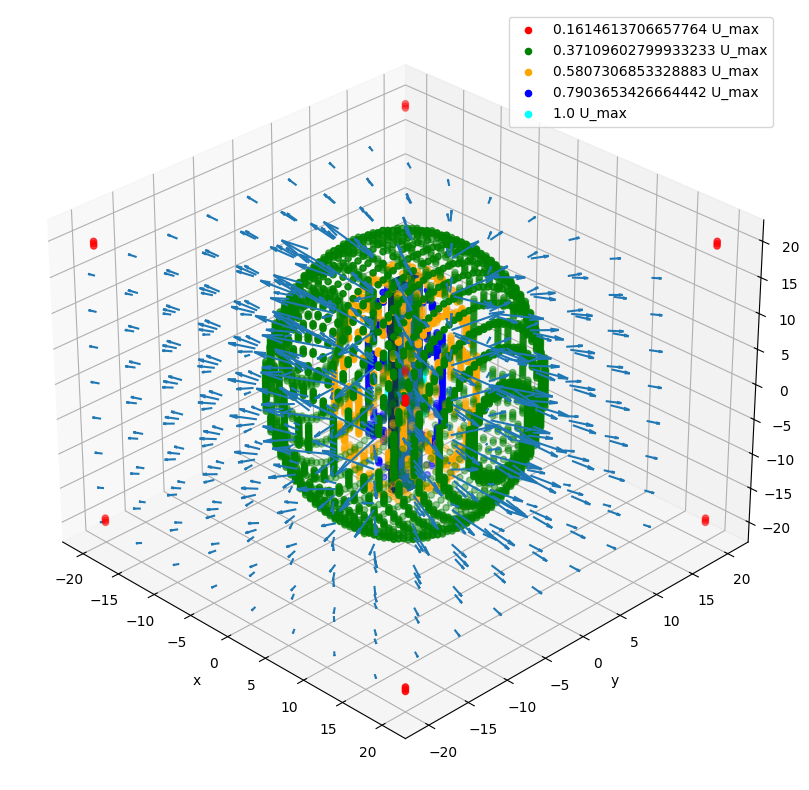

In [119]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")

plot_x, plot_y, plot_z = np.meshgrid(x, y, z, indexing="ij")
ax.quiver(
    plot_x[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    plot_y[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    plot_z[::subsampling[0], ::subsampling[1], ::subsampling[2]], 
    E_x[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    E_y[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    E_z[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    length=20/np.max(np.ma.masked_invalid(np.sqrt(E_x**2+E_y**2+E_z**2)))
)

# Koordinaten für die Ecke unten, vorne, links
antenna_lower_x = np.min(x[antenna_x_range])
antenna_lower_y = np.min(y[antenna_y_range])
antenna_lower_z = np.min(z[antenna_z_range])

# Koordinaten für die Ecke oben, hinten, rechts
antenna_higher_x = np.max(x[antenna_x_range])
antenna_higher_y = np.max(y[antenna_y_range])
antenna_higher_z = np.max(z[antenna_z_range])

# size in x,y,z direction
antenna_len_x = antenna_higher_x - antenna_lower_x
antenna_len_y = antenna_higher_y - antenna_lower_y
antenna_len_z = antenna_higher_z - antenna_lower_z

plot_cube_at(pos=(antenna_lower_x, antenna_lower_y, antenna_lower_z), size=(antenna_len_x, antenna_len_y, antenna_len_z), ax=ax)
for potential, color in zip(potentials, colors):
    U_pos = np.where(np.isclose(U, potential, rtol=1e-2))
    p = ax.scatter(x[U_pos[0]], y[U_pos[1]], z[U_pos[2]], color=color, label=f"{potential/(np.max(potentials))} U_max")

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, -45, 0)

MovieWriter Pillow unavailable; using Pillow instead.


f:\Uni\Feldtheorie\venv\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:177: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


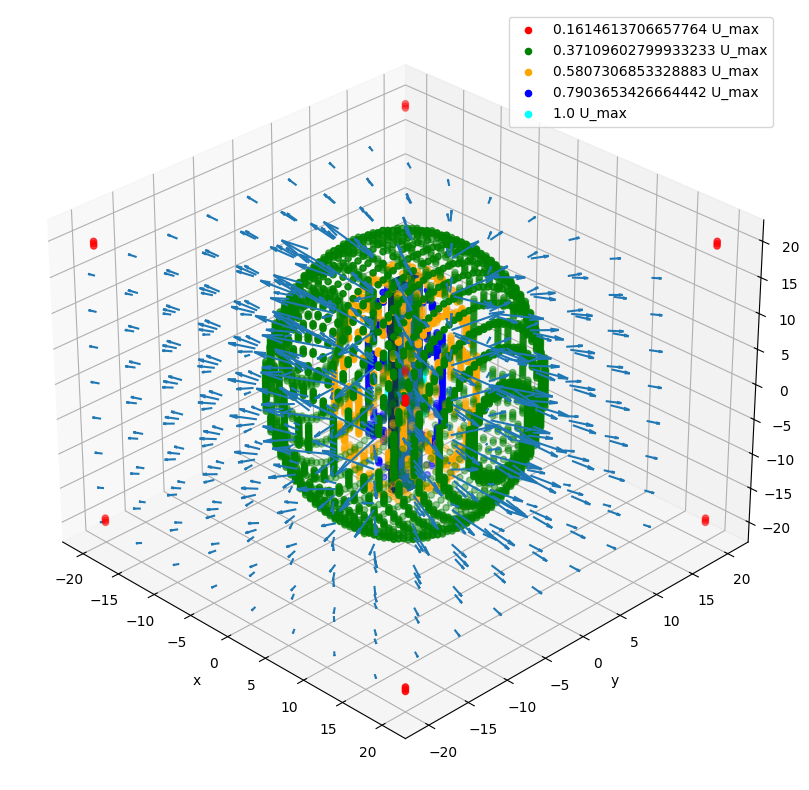

In [120]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
plot_x, plot_y, plot_z = np.meshgrid(x, y, z, indexing="ij")

ax.quiver(
    plot_x[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    plot_y[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    plot_z[::subsampling[0], ::subsampling[1], ::subsampling[2]], 
    E_x[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    E_y[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    E_z[::subsampling[0], ::subsampling[1], ::subsampling[2]],
    length=20/np.max(np.ma.masked_invalid(np.sqrt(E_x**2+E_y**2+E_z**2)))
)

# Koordinaten für die Ecke unten, vorne, links
antenna_lower_x = np.min(x[antenna_x_range])
antenna_lower_y = np.min(y[antenna_y_range])
antenna_lower_z = np.min(z[antenna_z_range])

# Koordinaten für die Ecke oben, hinten, rechts
antenna_higher_x = np.max(x[antenna_x_range])
antenna_higher_y = np.max(y[antenna_y_range])
antenna_higher_z = np.max(z[antenna_z_range])

# size in x,y,z direction
antenna_len_x = antenna_higher_x - antenna_lower_x
antenna_len_y = antenna_higher_y - antenna_lower_y
antenna_len_z = antenna_higher_z - antenna_lower_z

plot_cube_at(pos=(antenna_lower_x, antenna_lower_y, antenna_lower_z), size=(antenna_len_x, antenna_len_y, antenna_len_z), ax=ax)
for potential, color in zip(potentials, colors):
    U_pos = np.where(np.isclose(U, potential, rtol=1e-2))
    ax.scatter(x[U_pos[0]], y[U_pos[1]], z[U_pos[2]], color=color, label=f"{potential/(np.max(potentials))} U_max")

ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

def animate(frame):
    elev, azim, roll = 30, -45, 0
    if frame <= 360:
        elev = (elev + frame) % 360
    elif frame <= 360*2:
        azim = (azim + frame) % 360
    elif frame <= 360*3:
        roll = (roll + frame) % 360
    ax.view_init(elev, azim, roll)
    return fig

ani = animation.FuncAnimation(fig, animate, frames=360*3, interval=50)
ani.save("animation_komplex.gif", writer="Pillow")